In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lenses as ln

%matplotlib widget

#Keep this as long as lenses.py is being edited TODO delete once done
from importlib import reload  # Python 3.4+
ln = reload(ln)

48mm deep from last lens to film image
about 4.6cm diameter for lenses, keep in mind, so about 1.3-1.35 magnification for filters. (about half for achrom, which I think will be down the road)

I'm loading 4PartLensData/4PartLens3-1.npy
Making sure final image depth is high enough
Smaller than a meter please
Reasonable filter/film ratio


C:\Users\Levi Rhoden\AppData\Local\Temp\ipykernel_6240\1415545166.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  data = [data[x,:] for x in list(range(0, len(data))) if abs(data[x,1]/data[x,3])<100]
C:\Users\Levi Rhoden\AppData\Local\Temp\ipykernel_6240\1415545166.py:25: RuntimeWarning: invalid value encountered in scalar divide
  data = [data[x,:] for x in list(range(0, len(data))) if abs(data[x,1]/data[x,3])<100]


I'm loading 4PartLensData/4PartLens3-2.npy
Making sure final image depth is high enough
Smaller than a meter please
Reasonable filter/film ratio
I'm loading 4PartLensData/4PartLens3-3.npy
Making sure final image depth is high enough
Smaller than a meter please
Reasonable filter/film ratio
I'm loading 4PartLensData/4PartLens3-4.npy
Making sure final image depth is high enough
Smaller than a meter please
Reasonable filter/film ratio
I'm loading 4PartLensData/4PartLens3-5.npy
Making sure final image depth is high enough
Smaller than a meter please
Reasonable filter/film ratio
I'm loading 4PartLensData/4PartLens3-6.npy
Making sure final image depth is high enough
Smaller than a meter please
Reasonable filter/film ratio
I'm loading 4PartLensData/4PartLens3-7.npy
Making sure final image depth is high enough
Smaller than a meter please
Reasonable filter/film ratio
I'm loading 4PartLensData/4PartLens3-8.npy
Making sure final image depth is high enough
Smaller than a meter please
Reasonable fil

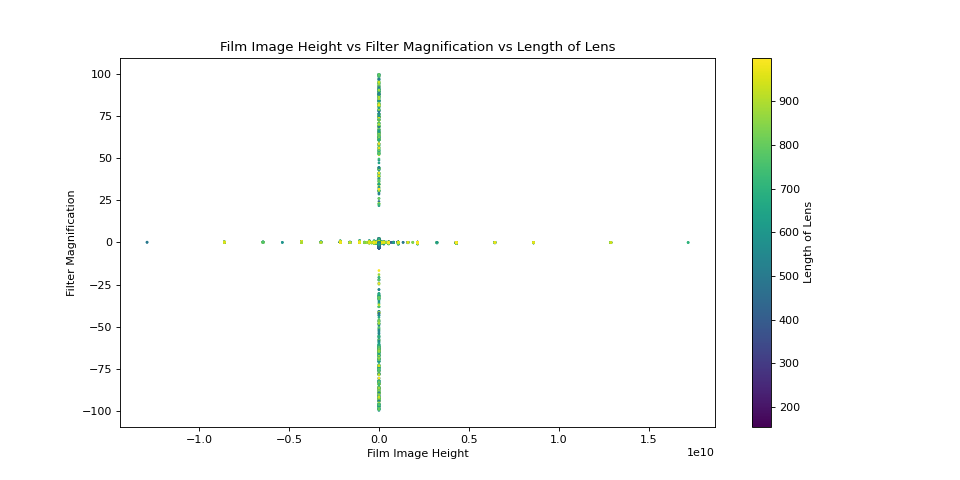

In [5]:
#Condition data, remove bad ones, save to compilation


#Loading in 4 part lens data

Data = np.zeros((1,11))
Data = np.array(Data)

for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
     name = "4PartLensData/4PartLens3-" + str(i) + ".npy"
     print("I'm loading " + name)
     data = np.array(np.load(name))

     np.array(data)
     #Make sure image is deep enough from last lens
     print('Making sure final image depth is high enough')
     data = [data[x,:] for x in list(range(0, len(data))) if data[x,2]-data[x,8]-data[x,9]-data[x,10]>48]
     data = np.array(data)
     #Make sure lens is less than a meter long
     print('Smaller than a meter please')
     data = [data[x,:] for x in list(range(0, len(data))) if data[x,2]<1000]
     data = np.array(data)
     #Make sure filter to film ratio is less than 100 (aka, not infinity)
     print('Reasonable filter/film ratio')
     data = [data[x,:] for x in list(range(0, len(data))) if abs(data[x,1]/data[x,3])<100]
     data = np.array(data)
     
     Data = np.concatenate((data,Data), axis=0)
     

print("The list is now " + str(len(data)) + " Lens systems long")

name = "4PartLensData/4PartLens3-ALL.npy"
np.save(name, data, allow_pickle=True, fix_imports=True)

ln.plotLensesColor(data[:,3], data[:,1]/data[:,3], data[:,2], 'Film Image Height vs Filter Magnification vs Length of Lens', "Film Image Height","Filter Magnification","Length of Lens")


The list is 1394346 long
The list is now 32835 Lens systems long


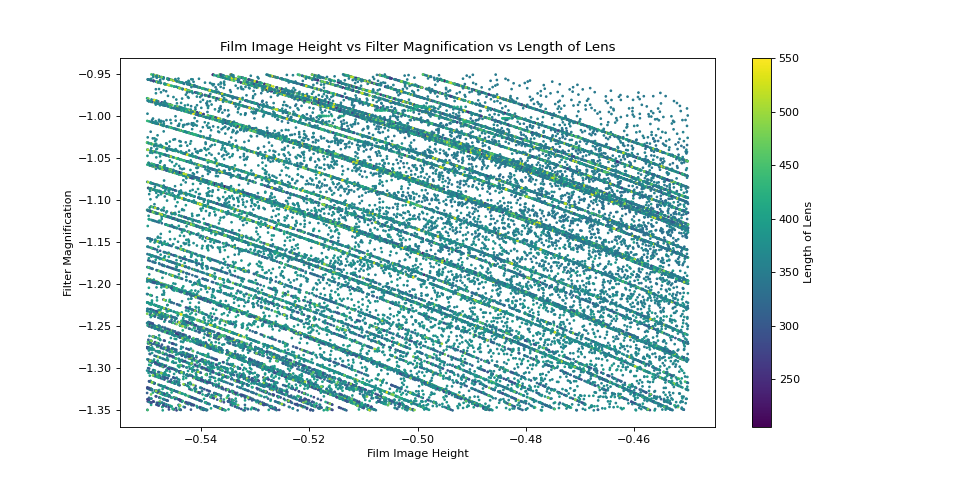

In [7]:
#Now we can edit and apply fuzzy filters
name = "4PartLensData/4PartLens3-ALL.npy"
data = np.array(np.load(name))

print("The list is " + str(len(data)) + " long")

#This tightens up our main params

data = np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if abs(data[x,3])<0.65 and abs(data[x,3])>0.45]
data = np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if data[x,2]<2000]
data = np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if abs(data[x,1]/data[x,3])>0.95]
data = np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if abs(data[x,3])>0.45 and abs(data[x,3])<0.55]
data = np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if abs(data[x,1]/data[x,3])<1.35]
data = np.array(data)
print("The list is now " + str(len(data)) + " Lens systems long")



ln.plotLensesColor(data[:,3], data[:,1]/data[:,3], data[:,2], 'Film Image Height vs Filter Magnification vs Length of Lens', "Film Image Height","Filter Magnification","Length of Lens")


The list is 516 long
The list is now 14 Lens systems long


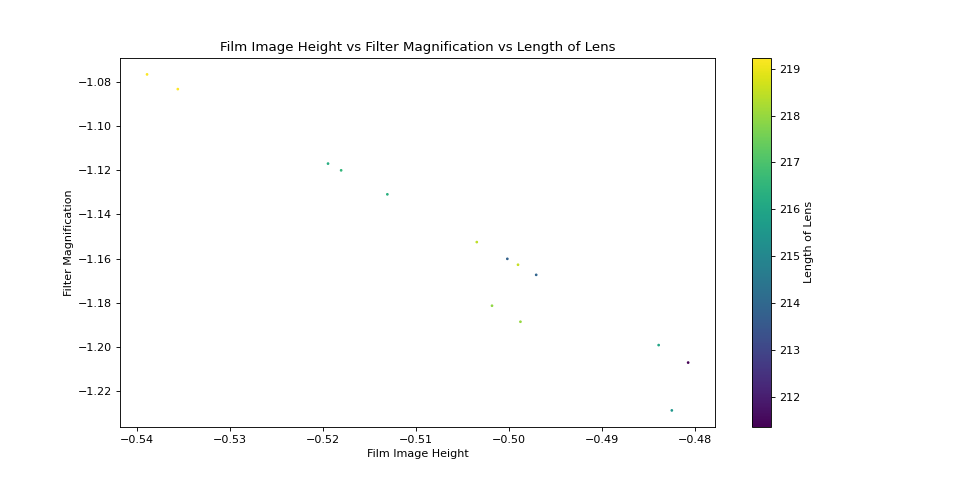

In [9]:
print("The list is " + str(len(data)) + " long")

#This cuts down lens design aspects, mainly gap length

data = np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if data[x,8]>10]
data = np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if data[x,9]>10]
data = np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if data[x,10]>10]
data = np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if data[x,2]<220]
data = np.array(data)

print("The list is now " + str(len(data)) + " Lens systems long")

ln.plotLensesColor(data[:,3], data[:,1]/data[:,3], data[:,2], 'Film Image Height vs Filter Magnification vs Length of Lens', "Film Image Height","Filter Magnification","Length of Lens")


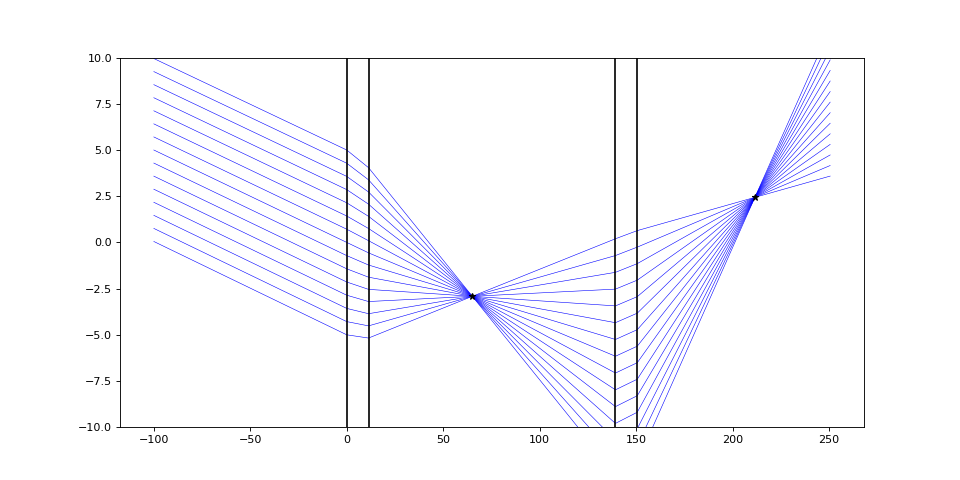

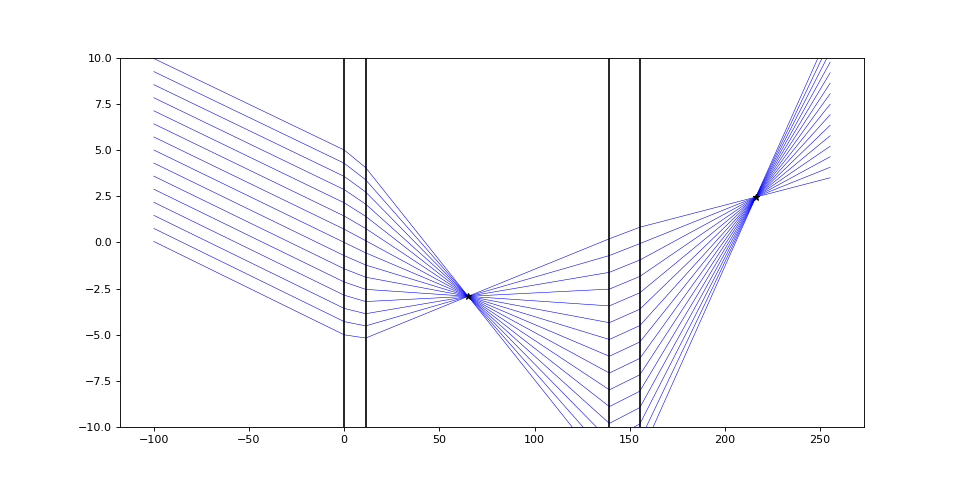

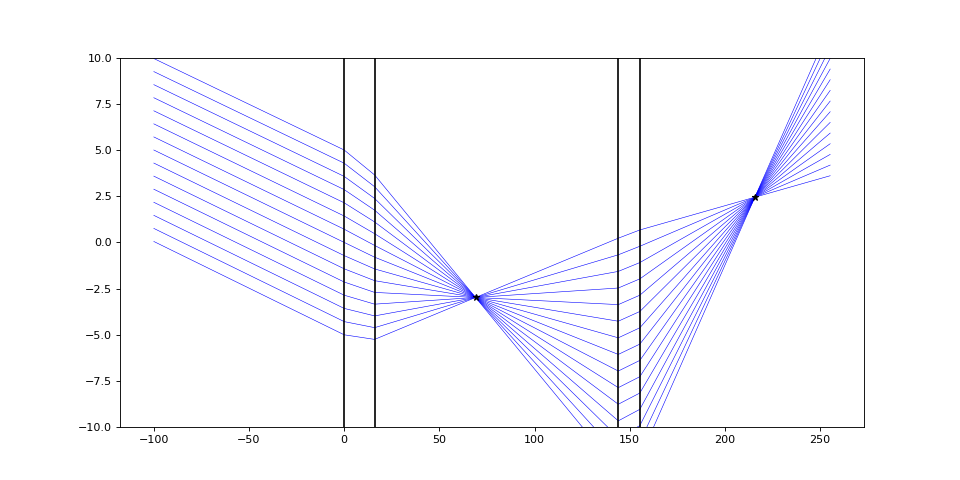

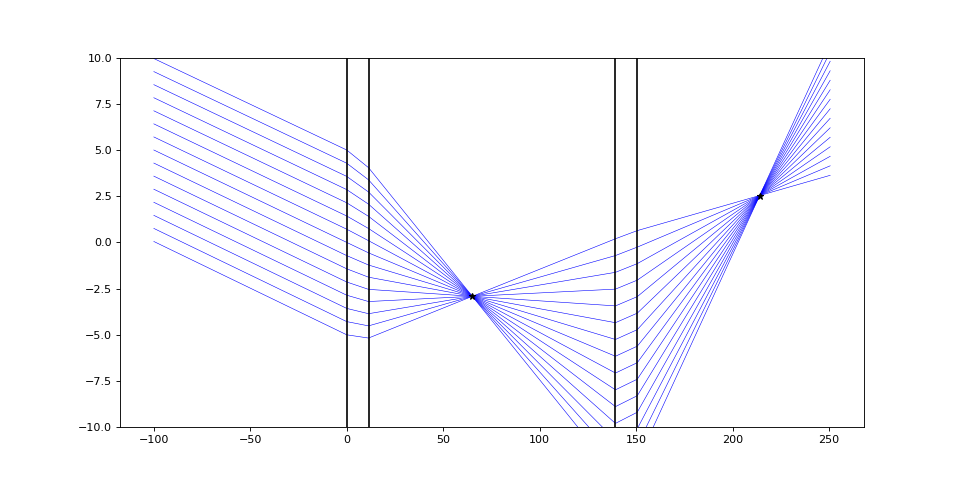

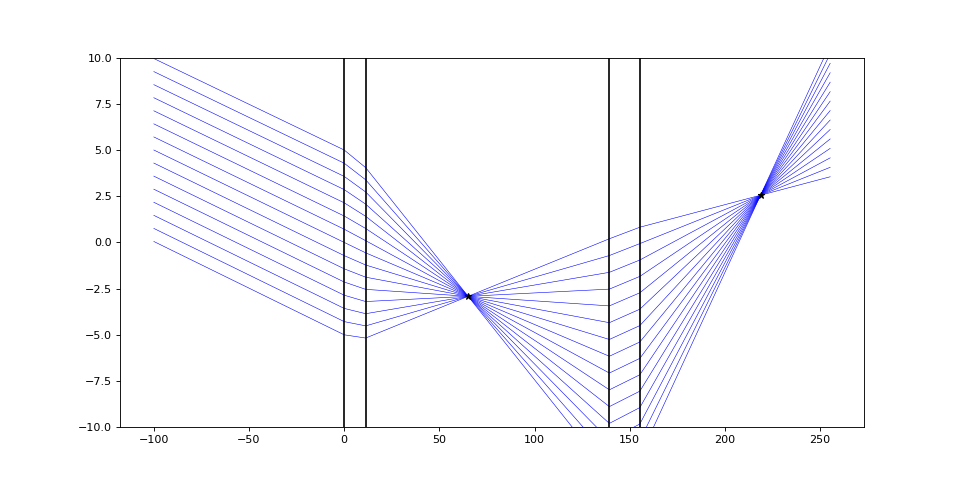

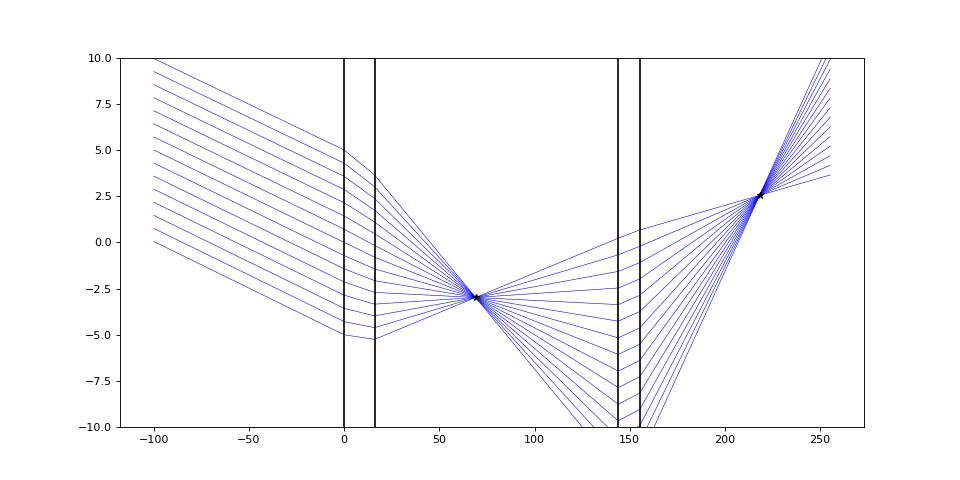

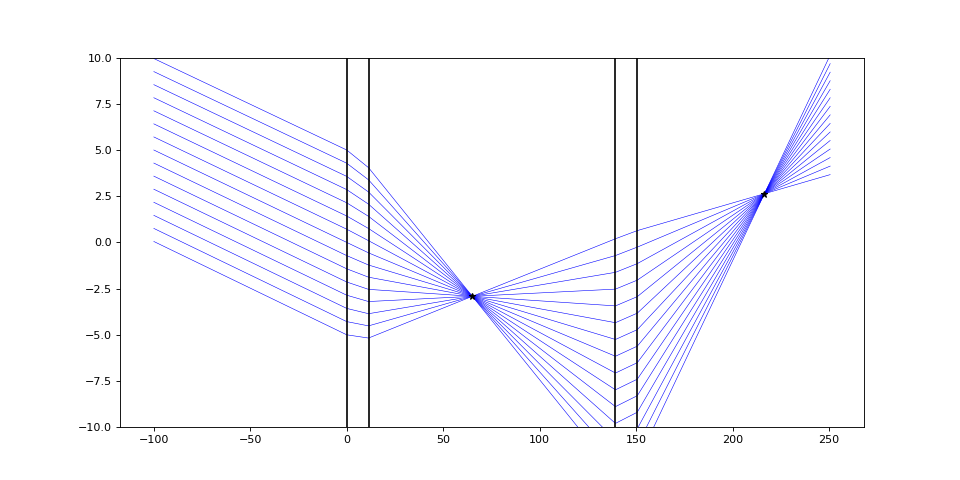

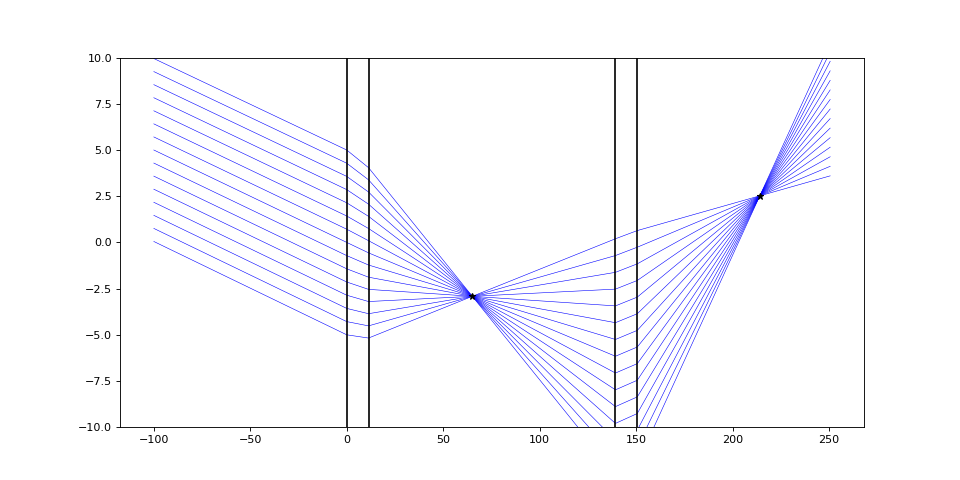

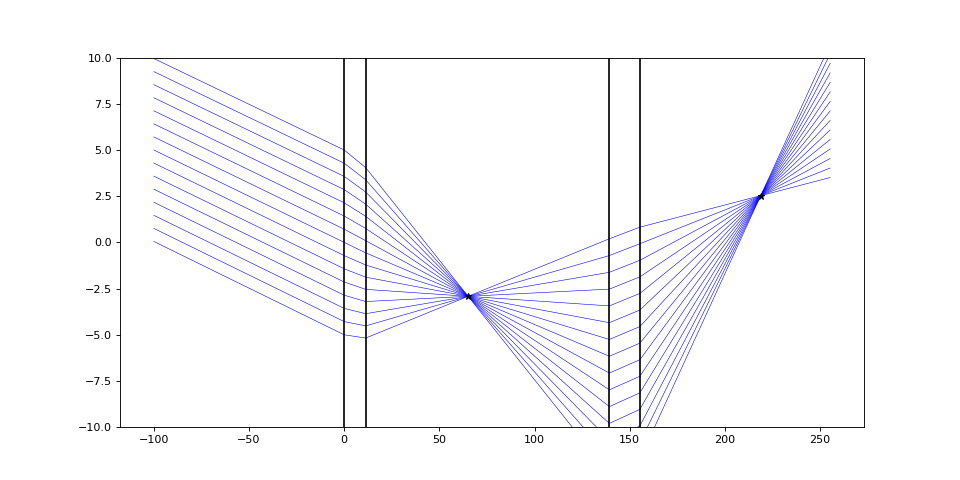

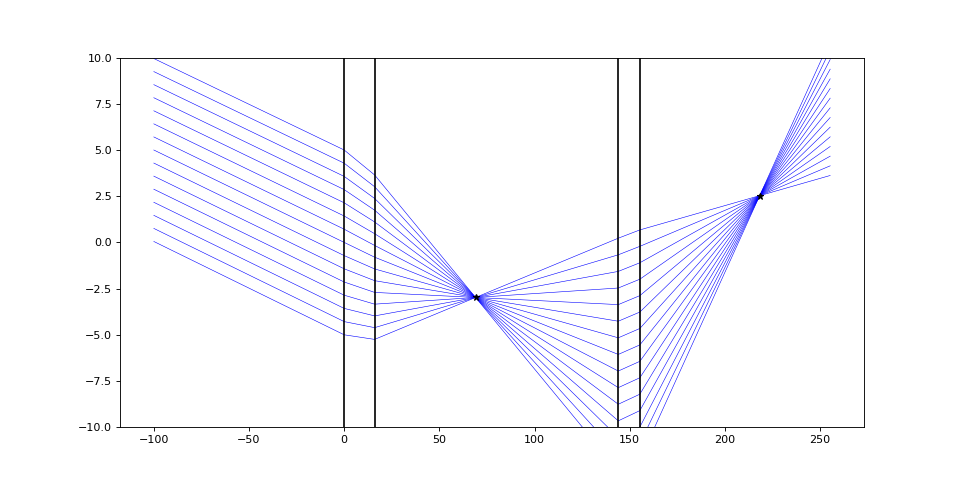

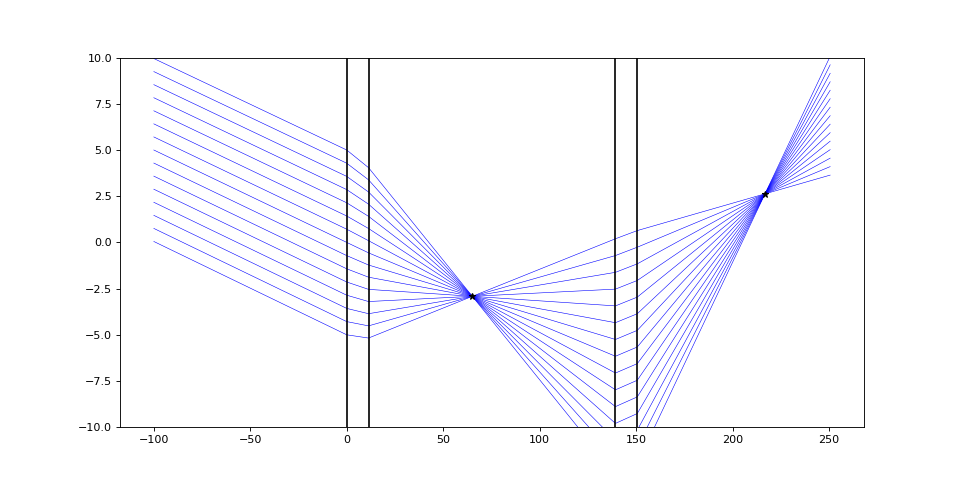

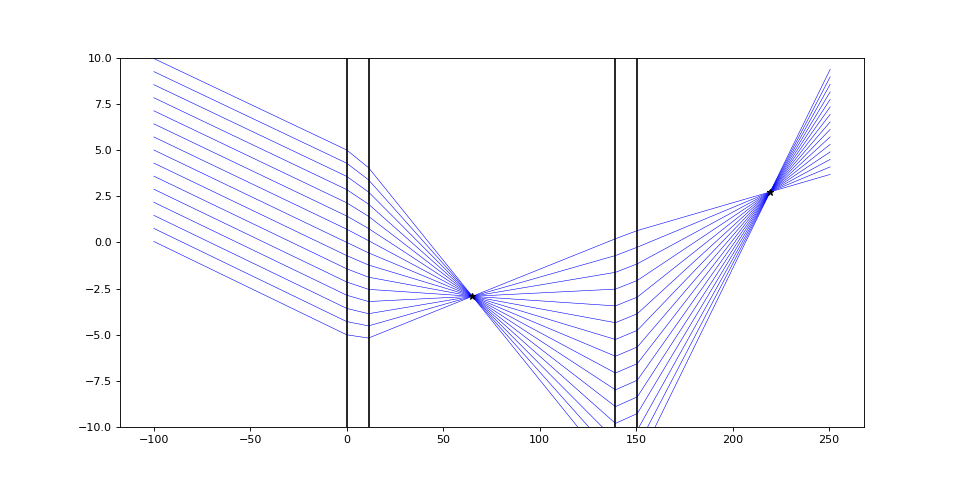

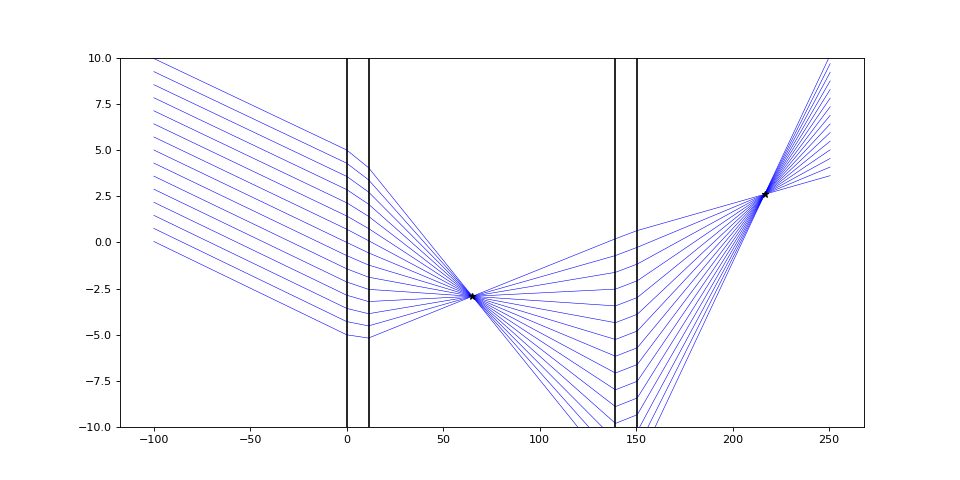

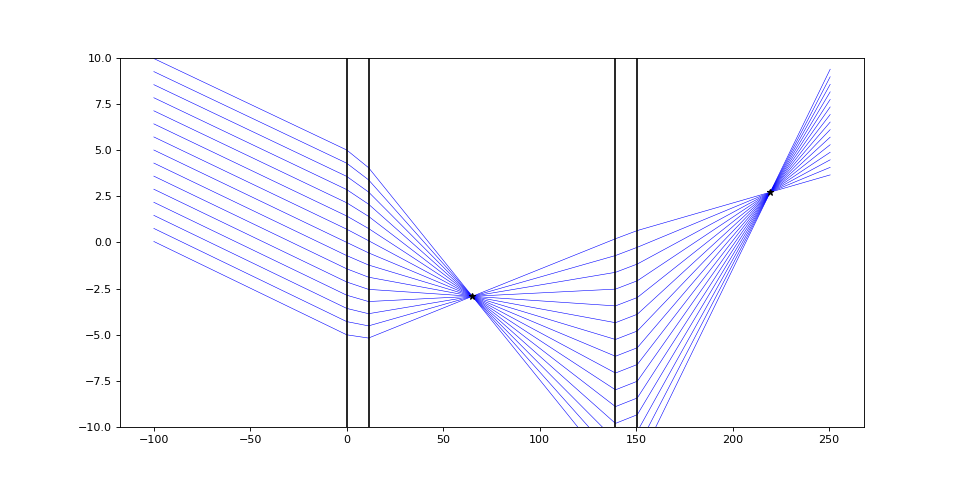

In [10]:
#Plot remaining lenses
for i in np.arange(0,len(data),1):
    lens = ln.opticalSystem([data[i,4],data[i,5],data[i,6],data[i,7]],[-100,100,data[i,8],data[i,9],data[i,10],100])
    ln.rayTracePlot(lens,ln.imageRays(-10000,500,5,15))


In [6]:
print(data[:,[4,5,6,7]])
print(data[:,[8,9,10]])

[[175.  73.  70.  73.]
 [175.  73.  70.  73.]
 [175.  73.  70.  73.]
 [175.  73.  70.  73.]
 [175.  73.  70.  73.]
 [175.  73.  70.  73.]
 [175.  73.  70.  73.]
 [175.  73.  70.  73.]
 [175.  73.  70.  73.]
 [175.  73.  70.  73.]
 [175.  73.  70.  73.]
 [175.  73.  70.  73.]
 [175.  73.  70.  73.]
 [175.  73.  70.  73.]
 [175.  73.  70.  73.]
 [175.  73.  70.  73.]
 [175.  73.  70.  73.]
 [175.  73.  73.  70.]
 [175.  73.  73.  70.]
 [175.  73.  73.  70.]
 [175.  73.  73.  70.]
 [175.  73.  73.  70.]
 [175.  73.  73.  70.]
 [175.  73.  73.  70.]
 [175.  73.  73.  70.]
 [175.  73.  73.  70.]
 [175.  73.  73.  70.]
 [175.  73.  73.  70.]
 [175.  73.  73.  70.]
 [175.  73.  73.  70.]
 [175.  73.  73.  70.]
 [175.  73.  73.  70.]
 [175.  73.  73.  70.]
 [175.  73.  73.  70.]
 [175.  73.  73.  73.]]
[[  1.         128.           1.        ]
 [  1.         128.           1.41421356]
 [  1.         128.           2.        ]
 [  1.         128.           2.82842712]
 [  1.         128.       